# maxvogt-analysis: Effretikon

The code in this notebook is based on [Martin Fleischmann's](https://martinfleischmann.net/) 2021 workshop [*Capturing the Structure of Cities with Data Science (SDSC)*](https://github.com/martinfleis/sdsc21-workshop), licensed under the [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). © 2021 Martin Fleischmann.

The geodata in this notebook is retrieved from OpenStreetMap. © OpenStreetMap Contributors.

<hr>

This notebook contains geodata and analyses for the following items of the [Max Vogt collection](https://mtwente.github.io/maxvogt/) by Moritz Twente and Luisa Omonsky:
- [EF010](https://mtwente.github.io/maxvogt/items/ef010.html)
- [EF013](https://mtwente.github.io/maxvogt/items/ef013.html)
- [EF026](https://mtwente.github.io/maxvogt/items/ef026.html)
- [EF042](https://mtwente.github.io/maxvogt/items/ef042.html)

<hr>

Open in an interactive in-browser environment: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mtwente/maxvogt-analysis/main?labpath=analysis%2Feffretikon.ipynb)

In [1]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

Pick a place, ideally a town with a good coverage in OpenStreetMap and its local CRS.

In [2]:
place = 'Effretikon'
point = 47.42582, 8.68657
address = 'Bahnhofstrasse 20–26, 8307 Effretikon'
dist = 2000
local_crs = 'EPSG:2056'

In [3]:
geopandas.tools.geocode(place).explore()

## Input data

Download data from OpenStreetMap.

### Buildings

In [4]:
#buildings = osmnx.features.features_from_place(place, tags={'building':True})
#buildings = osmnx.features.features_from_address(address, tags={'building':True}, dist=dist)
buildings = osmnx.features.features_from_point(point, tags={'building':True}, dist=dist)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [5]:
buildings

man_made  \
element_type osmid                 
way          10698615        NaN   
             10861441        NaN   
             27471783        NaN   
             27471789        NaN   
             27471791        NaN   
...                          ...   
             1305192870      NaN   
             1305192871      NaN   
             1305192872      NaN   
             1305192873      NaN   
relation     2275282         NaN   

                                                                  geometry  \
element_type osmid                                                           
way          10698615    POLYGON ((8.68686 47.42614, 8.68675 47.42617, ...   
             10861441    POLYGON ((8.70114 47.42318, 8.70137 47.42305, ...   
             27471783    POLYGON ((8.70639 47.42990, 8.70660 47.42996, ...   
             27471789    POLYGON ((8.70574 47.43075, 8.70607 47.43085, ...   
             27471791    POLYGON ((8.70551 47.43098, 8.70571 47.43104, ...   
...                                                                    ...   
             1305192870  POLYGON ((8.67150 47.43248, 8.67159 47.43250, ...   
             1305192871  POLYGON ((8.67140 47.43246, 8.67150 47.43248, ...   
             1305192872  POLYGON ((8.67110 47.43239, 8.67120 47.43241, ...   
             1305192873  POLYGON ((8.67101 47.43237, 8.67110 47.43239, ...   
relation     2275282     POLYGON ((8.67432 47.43214, 8.67427 47.43220, ...   

                            addr:city addr:housenumber addr:postcode  \
element_type osmid                                                     
way          10698615      Effretikon               20          8307   
             10861441             NaN               11           NaN   
             27471783      Effretikon                9          8307   
             27471789      Effretikon                6          8307   
             27471791      Effretikon                4          8307   
...                               ...              ...           ...   
             1305192870  Tagelswangen               21          8317   
             1305192871  Tagelswangen               23          8317   
             1305192872  Tagelswangen               27          8317   
             1305192873  Tagelswangen               29          8317   
relation     2275282              NaN               26           NaN   

                               addr:street amenity brand check_date operator  \
element_type osmid                                                             
way          10698615       Bahnhofstrasse     NaN   NaN        NaN      NaN   
             10861441    Sportplatzstrasse  school   NaN        NaN      NaN   
             27471783         Spinnereiweg     NaN   NaN        NaN  Repoxit   
             27471789         Spinnereiweg     NaN   NaN        NaN      NaN   
             27471791         Spinnereiweg     NaN   NaN        NaN      NaN   
...                                    ...     ...   ...        ...      ...   
             1305192870  Rosenacherstrasse     NaN   NaN        NaN      NaN   
             1305192871  Rosenacherstrasse     NaN   NaN        NaN      NaN   
             1305192872  Rosenacherstrasse     NaN   NaN        NaN      NaN   
             1305192873  Rosenacherstrasse     NaN   NaN        NaN      NaN   
relation     2275282           Ringstrasse     NaN   NaN        NaN      NaN   

                         ... toilets:disposal tower:type fixme start_date  \
element_type osmid       ...                                                
way          10698615    ...              NaN        NaN   NaN        NaN   
             10861441    ...              NaN        NaN   NaN        NaN   
             27471783    ...              NaN        NaN   NaN        NaN   
             27471789    ...              NaN        NaN   NaN        NaN   
             27471791    ...              NaN        NaN   NaN        NaN   
...                    

In [6]:
buildings.geom_type.value_counts()

Polygon    3107
Name: count, dtype: int64

In [7]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

In [8]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [9]:
buildings["uID"] = range(len(buildings))

In [10]:
buildings

geometry   uID
0     POLYGON ((2694178.455 1253564.090, 2694170.145...     0
1     POLYGON ((2695261.161 1253252.357, 2695278.420...     1
2     POLYGON ((2695645.386 1254005.539, 2695661.024...     2
3     POLYGON ((2695594.577 1254099.226, 2695618.911...     3
4     POLYGON ((2695576.386 1254124.797, 2695591.311...     4
...                                                 ...   ...
3102  POLYGON ((2693008.125 1254249.946, 2693015.052...  3102
3103  POLYGON ((2693001.191 1254247.558, 2693008.125...  3103
3104  POLYGON ((2692978.731 1254239.743, 2692985.673...  3104
3105  POLYGON ((2692971.789 1254237.366, 2692978.731...  3105
3106  POLYGON ((2693222.163 1254216.351, 2693217.690...  3106

[3107 rows x 2 columns]

### Streets

In comparison to Martin Fleischmann's workshop, I here set `truncate_by_edge` to be `True`.
Depending on the OSM mapping quality of the place at hand, it might also be necessary to change the value of `network_type`. See [geopandas documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_place) for options.

In [11]:
#osm_graph = osmnx.graph_from_place(place, network_type='drive', truncate_by_edge=True)
#osm_graph = osmnx.graph_from_address(place, network_type='drive', truncate_by_edge=True, dist=dist)
osm_graph = osmnx.graph_from_point(point, network_type='drive', truncate_by_edge=True, dist=dist)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [12]:
osm_graph = osmnx.projection.project_graph(osm_graph, to_crs=local_crs)

In [13]:
streets = osmnx.graph_to_gdfs(
    osm_graph, 
    nodes=False, 
    edges=True,
    node_geometry=False, 
    fill_edge_geometry=True
)

In [14]:
streets.explore()

In [15]:
streets

osmid  \
u          v          key                                                      
28219650   267263532  0                                            120876445   
           1354242238 0                                            120876447   
267263532  282003424  0                       [43364482, 43364484, 10973109]   
           96526472   0                                [40485306, 120876445]   
           28219650   0                                            120876445   
...                                                                      ...   
3115744969 256507544  0    [10866241, 54203597, 10866255, 4987473, 554245...   
8492007306 8492040932 0                                            914206924   
           7671019415 0                                            914206938   
8492040923 8492007308 0                                             54203573   
           683647614  0                                             10972867   

                          lanes    ref                                   name  \
u          v          key                                                       
28219650   267263532  0       2      1                         Zürcherstrasse   
           1354242238 0       1      1                         Zürcherstrasse   
267263532  282003424  0     NaN    NaN                    Schürliacherstrasse   
           96526472   0       2      1  [Zürcherstrasse, Winterthurerstrasse]   
           28219650   0       2      1                         Zürcherstrasse   
...                         ...    ...                                    ...   
3115744969 256507544  0       1  A1;A4                                    NaN   
8492007306 8492040932 0       2      1                         Zürcherstrasse   
           7671019415 0       1    NaN                        Lindauerstrasse   
8492040923 8492007308 0       1      1                         Zürcherstrasse   
           683647614  0       1    NaN                        Lindauerstrasse   

                                 highway   maxspeed  oneway reversed   length  \
u          v          key                                                       
28219650   267263532  0          primary         80   False    False  748.399   
           1354242238 0          primary         80    True    False   96.607   
267263532  282003424  0         tertiary        NaN   False    False  381.926   
           96526472   0          primary         80   False    False  296.120   
           28219650   0          primary         80   False     True  748.399   
...                                  ...        ...     ...      ...      ...   
3115744969 256507544  0    motorway_link  [120, 80]    True    False  488.266   
8492007306 8492040932 0          primary         50    True    False   10.244   
           7671019415 0         tertiary        NaN    True    False   66.964   
8492040923 8492007308 0          primary         50    True    False   10.456   
           683647614  0         tertiary         50    True    False   49.898   

                                                                    geometry  \
u          v          key                                                      
28219650   267263532  0    LINESTRING (2693882.882 1254902.446, 2693934.0...   
           1354242238 0    LINESTRING (2693882.882 1254902.446, 2693866.6...   
267263532  282003424  0    LINESTRING (2694458.461 1255382.063, 2694455.2...   
           96526472   0    LINESTRING (2694458.461 1255382.063, 2694502.9...   
           28219650   0    LINESTRING (2694458.461 1255382.063, 2694326.6...   
...                                                                      ...   
3115744969 256507544  0    LINESTRING (2694836.580 1255727.290, 2694806.5...   
8492007306 8492040932 0    LINESTRING (2693377.744 1254252.919, 2693369.2...   
           7671019415 0    LINESTRING (2693377.744 1254252.919, 2693370.6...   
8492040923 8492007308 0    LINESTRING (269

In [16]:
streets = momepy.remove_false_nodes(streets)
streets = streets[["geometry"]]
streets["nID"] = range(len(streets))

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


In [17]:
streets

geometry  nID
0    LINESTRING (2693882.882 1254902.446, 2693934.0...    0
1    LINESTRING (2693882.882 1254902.446, 2693866.6...    1
2    LINESTRING (2694458.461 1255382.063, 2694502.9...    2
3    LINESTRING (2694458.461 1255382.063, 2694326.6...    3
4    LINESTRING (2693810.340 1254838.802, 2693816.2...    4
..                                                 ...  ...
841  LINESTRING (2695704.656 1253901.526, 2695703.1...  841
842  LINESTRING (2695586.932 1255377.355, 2695590.7...  842
843  LINESTRING (2696080.215 1251582.154, 2696131.5...  843
844  LINESTRING (2696135.113 1252377.866, 2696191.7...  844
845  LINESTRING (2696135.113 1252377.866, 2696160.3...  845

[846 rows x 2 columns]

## Generated data

### Tessellation

We can generate a spatail unit using Voronoi tessellation with given building footprints.

In [18]:
limit = momepy.buffered_limit(buildings, 100)

tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/1328706492.py:3: FutureWarning: Class based API like `momepy.Tessellation` is deprecated. Replace it with `momepy.morphological_tessellation` or `momepy.enclosed_tessellation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/m

### Link streets

Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [19]:
buildings = buildings.sjoin_nearest(streets, max_distance=1000, how="left")

In [20]:
buildings

geometry   uID  index_right  \
0     POLYGON ((2694178.455 1253564.090, 2694170.145...     0         47.0   
0     POLYGON ((2694178.455 1253564.090, 2694170.145...     0         44.0   
1     POLYGON ((2695261.161 1253252.357, 2695278.420...     1        694.0   
1     POLYGON ((2695261.161 1253252.357, 2695278.420...     1        696.0   
2     POLYGON ((2695645.386 1254005.539, 2695661.024...     2        841.0   
...                                                 ...   ...          ...   
3102  POLYGON ((2693008.125 1254249.946, 2693015.052...  3102        762.0   
3103  POLYGON ((2693001.191 1254247.558, 2693008.125...  3103        762.0   
3104  POLYGON ((2692978.731 1254239.743, 2692985.673...  3104        762.0   
3105  POLYGON ((2692971.789 1254237.366, 2692978.731...  3105        762.0   
3106  POLYGON ((2693222.163 1254216.351, 2693217.690...  3106        773.0   

        nID  
0      47.0  
0      44.0  
1     694.0  
1     696.0  
2     841.0  
...     ...  
3102  762.0  
3103  762.0  
3104  762.0  
3105  762.0  
3106  773.0  

[4745 rows x 4 columns]

In [21]:
buildings = buildings.drop_duplicates("uID").drop(columns="index_right")

In [22]:
tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

## Measure

Measure individual morphometric characters.

### Dimensions

In [23]:
buildings["area"] = buildings.area
tessellation["area"] = tessellation.area
streets["length"] = streets.length

### Shape

In [24]:
buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/1902756608.py:1: FutureWarning: Class based API like `momepy.EquivalentRectangularIndex` is deprecated. Replace it with `momepy.equivalent_rectangular_index` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [25]:
buildings['elongation'] = momepy.Elongation(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/3723954296.py:1: FutureWarning: Class based API like `momepy.Elongation` is deprecated. Replace it with `momepy.elongation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['elongation'] = momepy.Elongation(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [26]:
tessellation['convexity'] = momepy.Convexity(tessellation).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/2335586521.py:1: FutureWarning: Class based API like `momepy.Convexity` is deprecated. Replace it with `momepy.convexity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation['convexity'] = momepy.Convexity(tessellation).series


In [27]:
streets["linearity"] = momepy.Linearity(streets).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/3802614628.py:1: FutureWarning: Class based API like `momepy.Linearity` is deprecated. Replace it with `momepy.linearity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  streets["linearity"] = momepy.Linearity(streets).series


/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


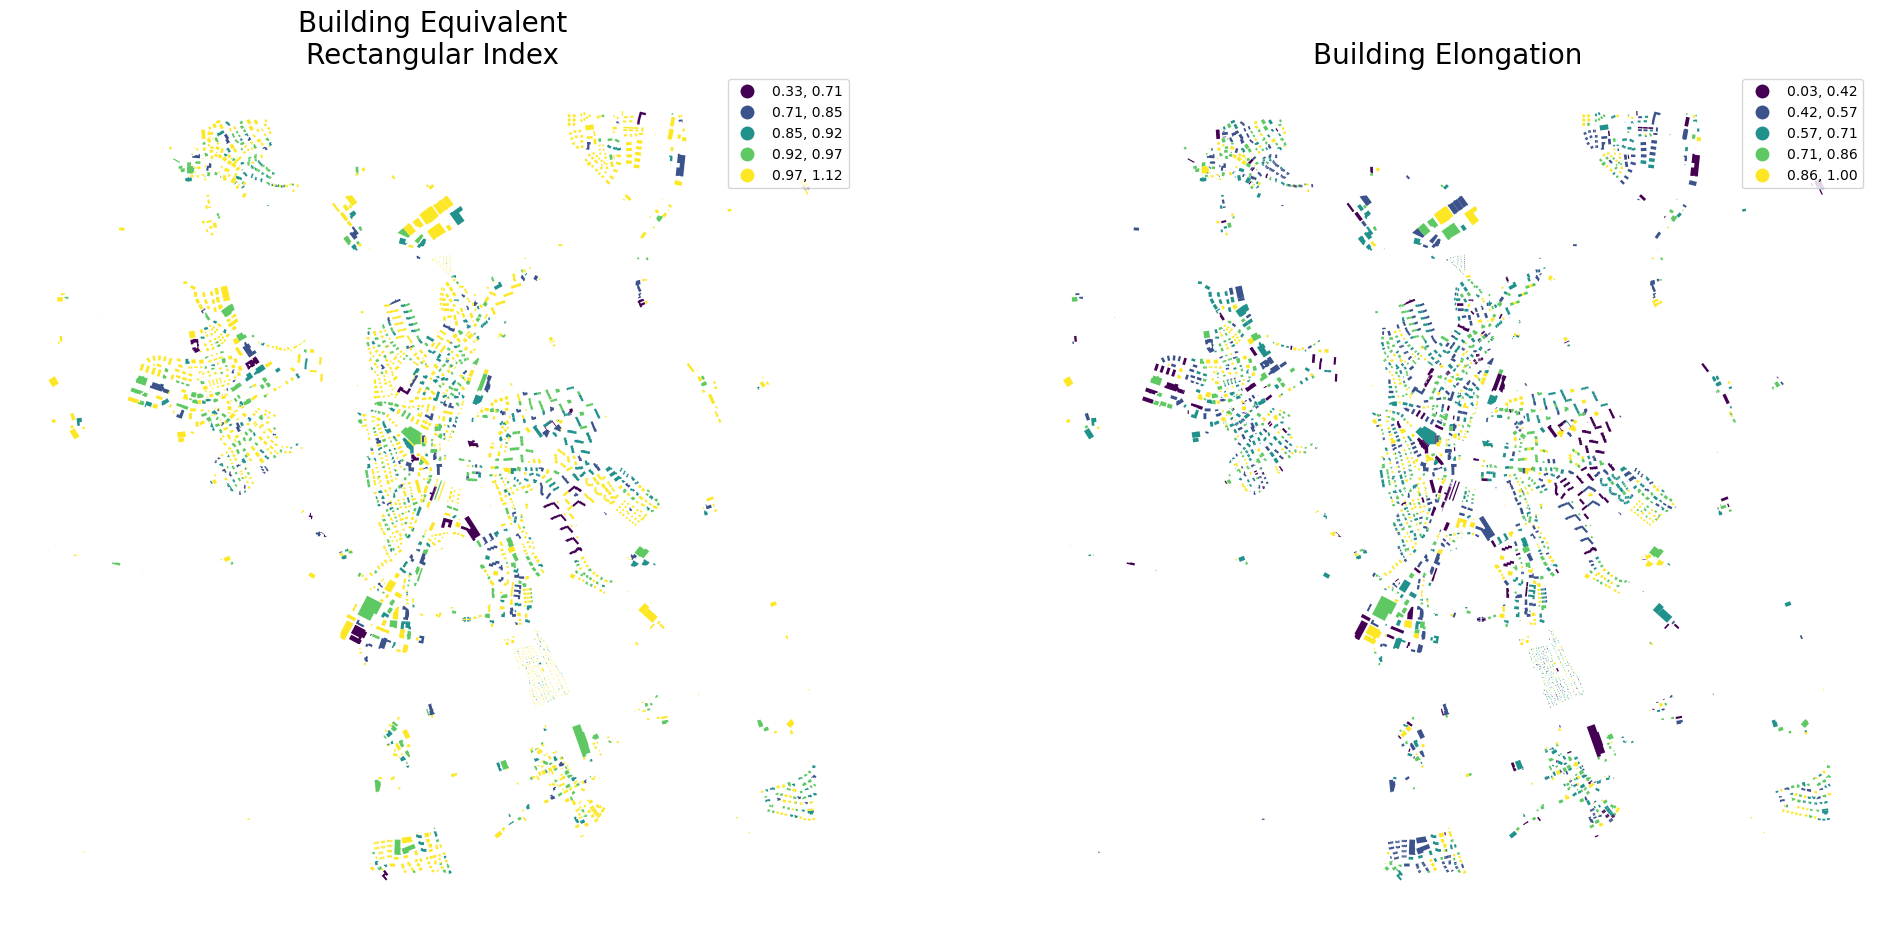

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("eri", ax=ax[0], scheme="natural_breaks", legend=True)
buildings.plot("elongation", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Building Equivalent\nRectangular Index', fontsize=20)
ax[1].set_title('Building Elongation', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Effretikon/eri_and_elongation.pdf')  

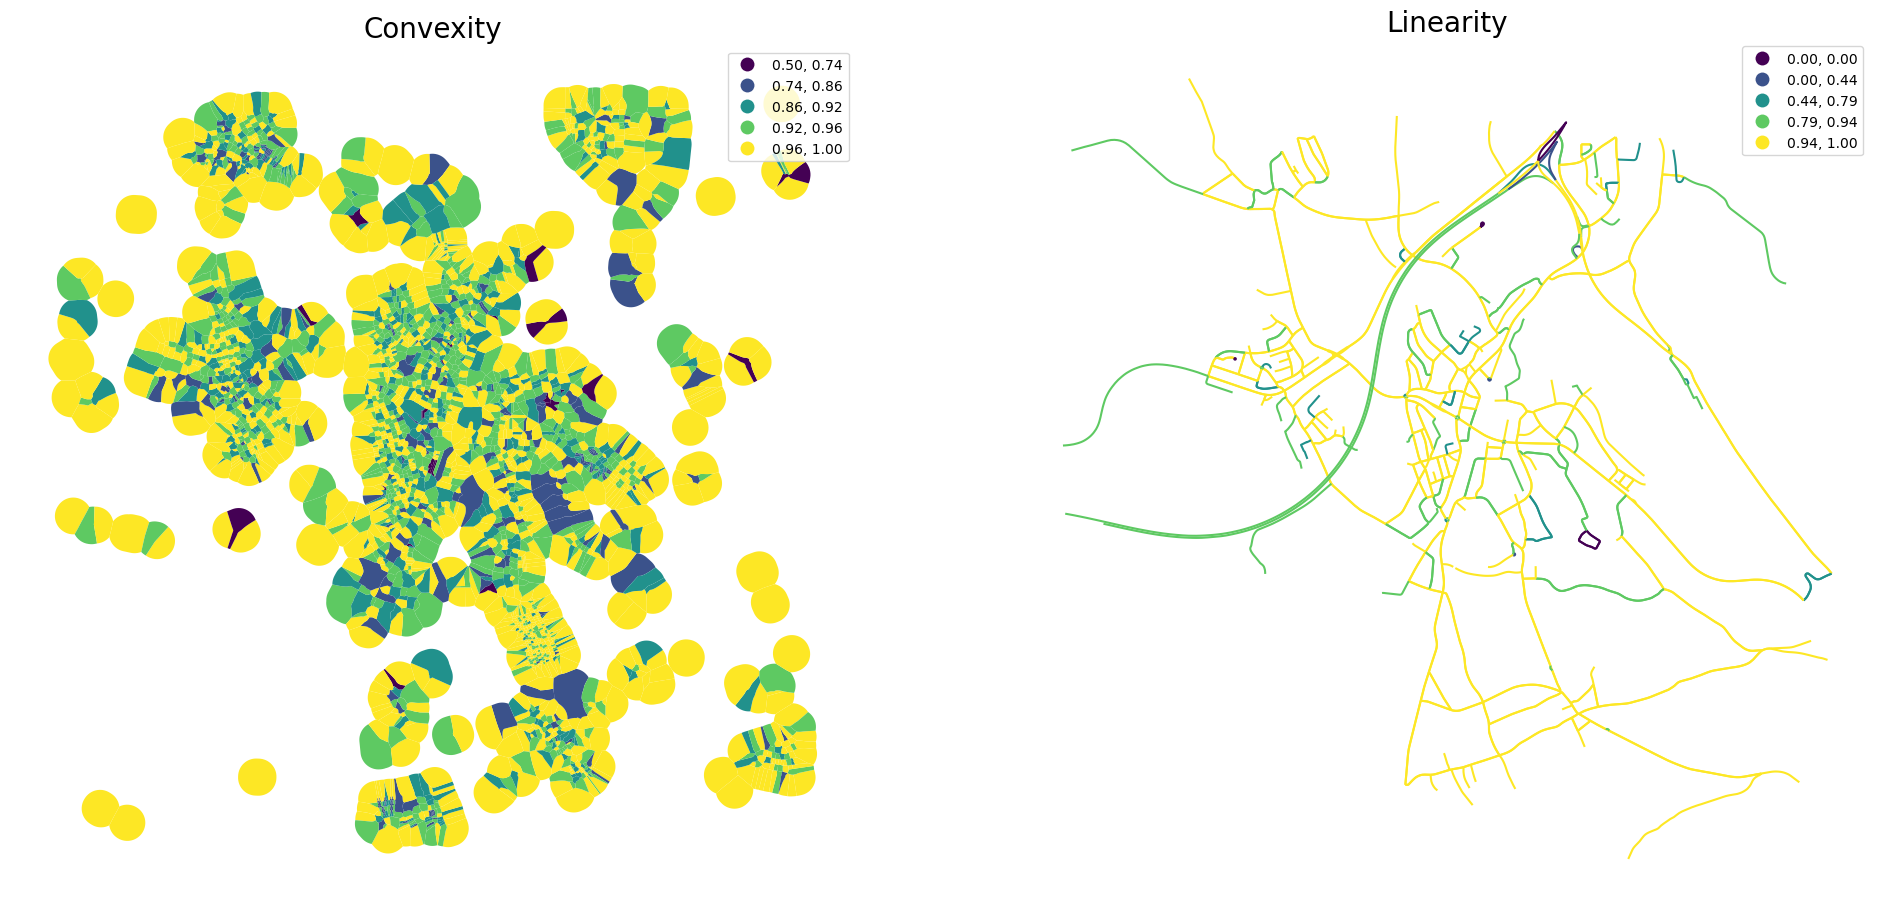

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("linearity", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Linearity', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Effretikon/convexity_and_linearity.pdf')  

### Spatial distribution

In [30]:
buildings["shared_walls"] = momepy.SharedWallsRatio(buildings).series

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/momepy/distribution.py:214: FutureWarning: Class based API like `momepy.SharedWalls` or `momepy.SharedWallsRatio` is deprecated. Replace it with `momepy.shared_walls` or explicitly computing `momepy.shared_walls / gdf.length` respectively to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  super().__init__(gdf)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


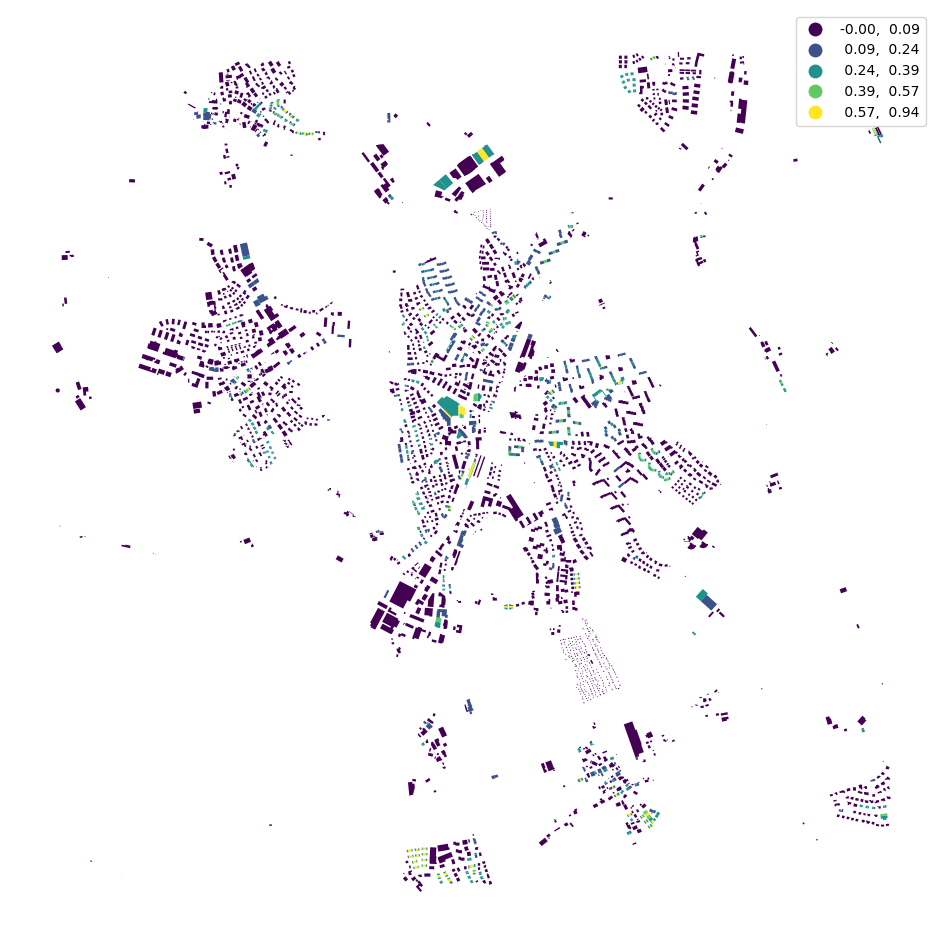

In [31]:
buildings.plot("shared_walls", figsize=(12, 12), scheme="natural_breaks", legend=True).set_axis_off()

plt.savefig('../results/Effretikon/sharedwalls.pdf')  

Generate spatial weights matrix using `libpysal`.

In [32]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [33]:
tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    buildings["neighbor_distance"] = momepy.NeighborDistance(buildings, queen_1, "uID", verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/1669107924.py:1: FutureWarning: Class based API like `momepy.Neighbors` is deprecated. Replace it with `momepy.neighbors` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/1669107924.py:2: FutureWarning: `momepy.CoveredArea` is deprecated. Replace it with `.describe()` method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series


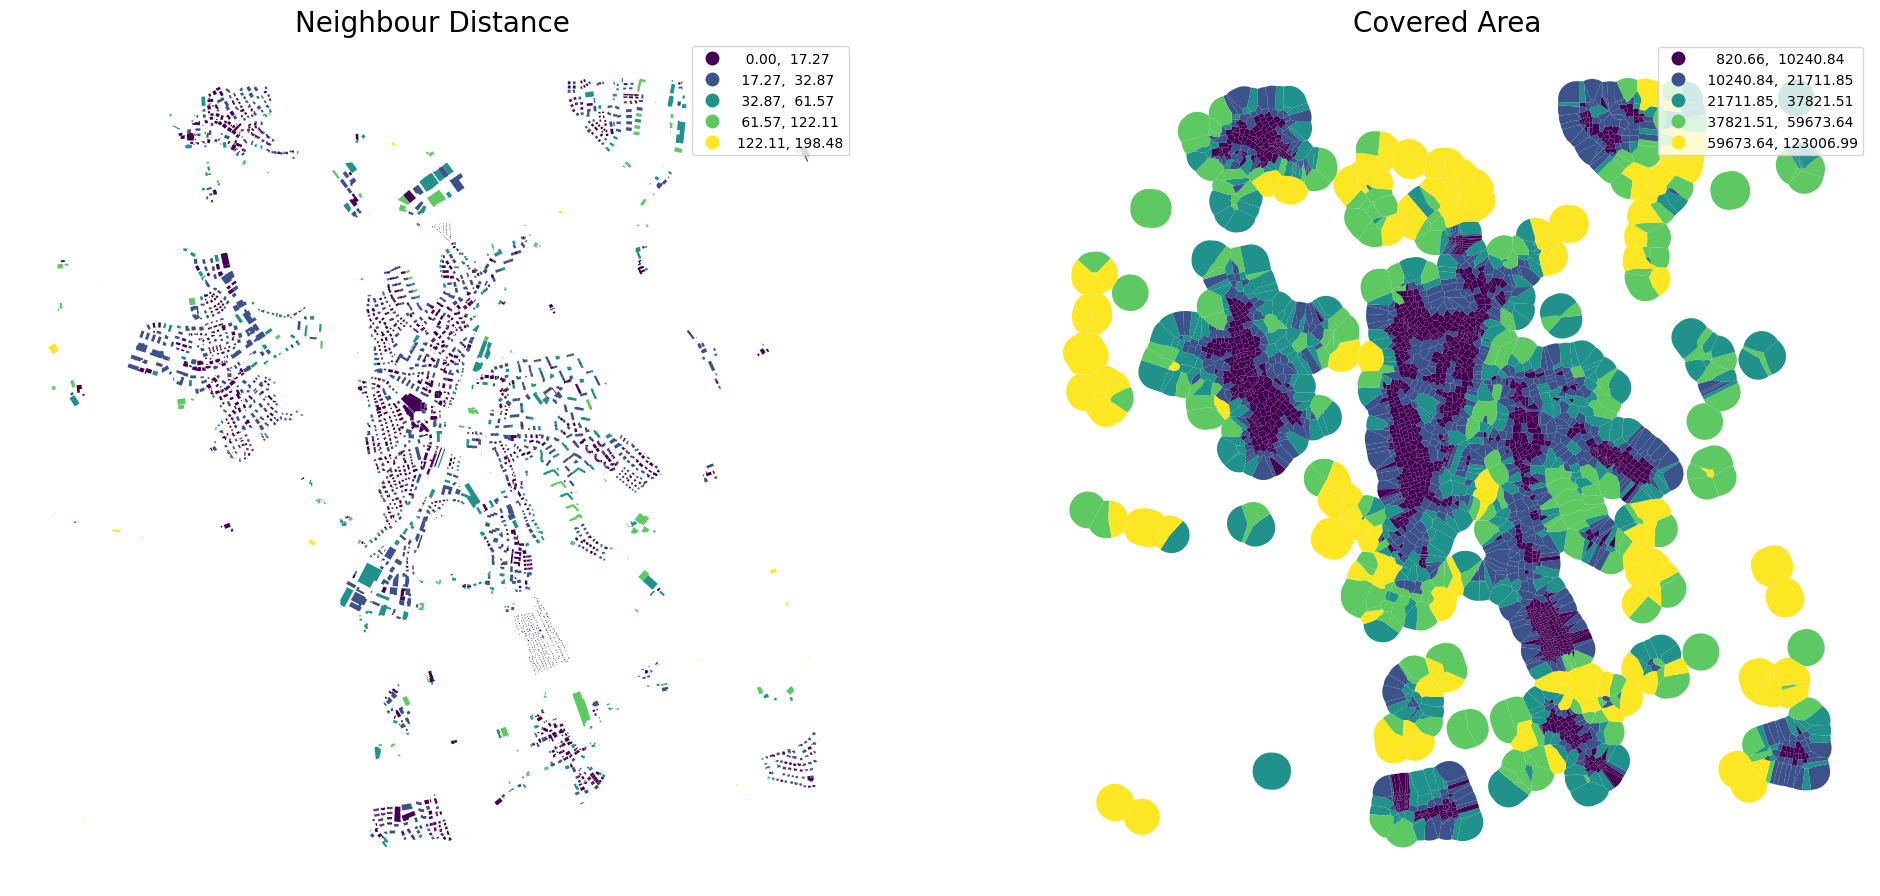

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("neighbor_distance", ax=ax[0], scheme="natural_breaks", legend=True)
tessellation.plot("covered_area", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Neighbour Distance', fontsize=20)
ax[1].set_title('Covered Area', fontsize=20)


ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Effretikon/neighbourdist_and_coveredarea.pdf')  

In [35]:
queen_3 = momepy.sw_high(k=3, weights=queen_1)
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)

buildings['interbuilding_distance'] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', queen_3, verbose=False).series
buildings['adjacency'] = momepy.BuildingAdjacency(buildings, queen_3, 'uID', buildings_q1, verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/3221532125.py:1: FutureWarning: `momepy.sw_high` is deprecated. Replace it with .higher_order() method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  queen_3 = momepy.sw_high(k=3, weights=queen_1)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/3221532125.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/3221532125.py:4: FutureWarning: Class based API like `momepy.MeanInterbuildingDistance` is deprecated. Replace it with `momepy.mean_interbuilding_distance` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['interbuilding_distance'] 

In [36]:
#fig, ax = plt.subplots(1, 2, figsize=(24, 12))
#
#buildings.plot("interbuilding_distance", ax=ax[0], scheme="natural_breaks", legend=True)
#buildings.plot("adjacency", ax=ax[1], scheme="natural_breaks", legend=True)
#
#ax[0].set_axis_off()
#ax[1].set_axis_off()

In [37]:
profile = momepy.StreetProfile(streets, buildings)
streets["width"] = profile.w
streets["width_deviation"] = profile.wd
streets["openness"] = profile.o

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/2648127835.py:1: FutureWarning: Class based API like `momepy.StreetProfile` is deprecated. Replace it with `momepy.street_profile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  profile = momepy.StreetProfile(streets, buildings)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in intersection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


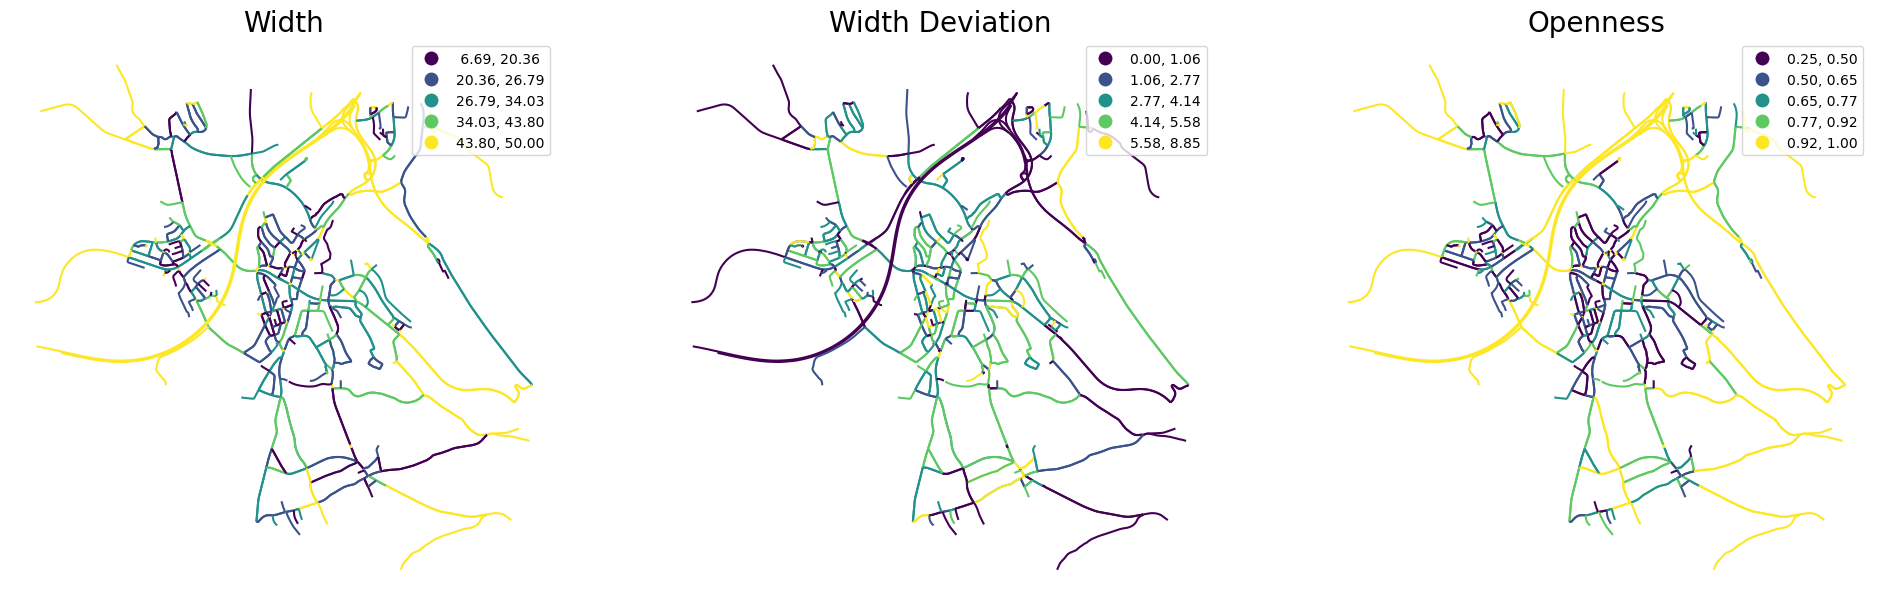

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("width_deviation", ax=ax[1], scheme="natural_breaks", legend=True)
streets.plot("openness", ax=ax[2], scheme="natural_breaks", legend=True)

ax[0].set_title('Width', fontsize=20)
ax[1].set_title('Width Deviation', fontsize=20)
ax[2].set_title('Openness', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Effretikon/road_network.pdf')  

### Intensity

In [39]:
tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/1819725789.py:1: FutureWarning: `momepy.AreaRatio` is deprecated. Replace it with a direct division of areas or momepy.describe_agg() or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series


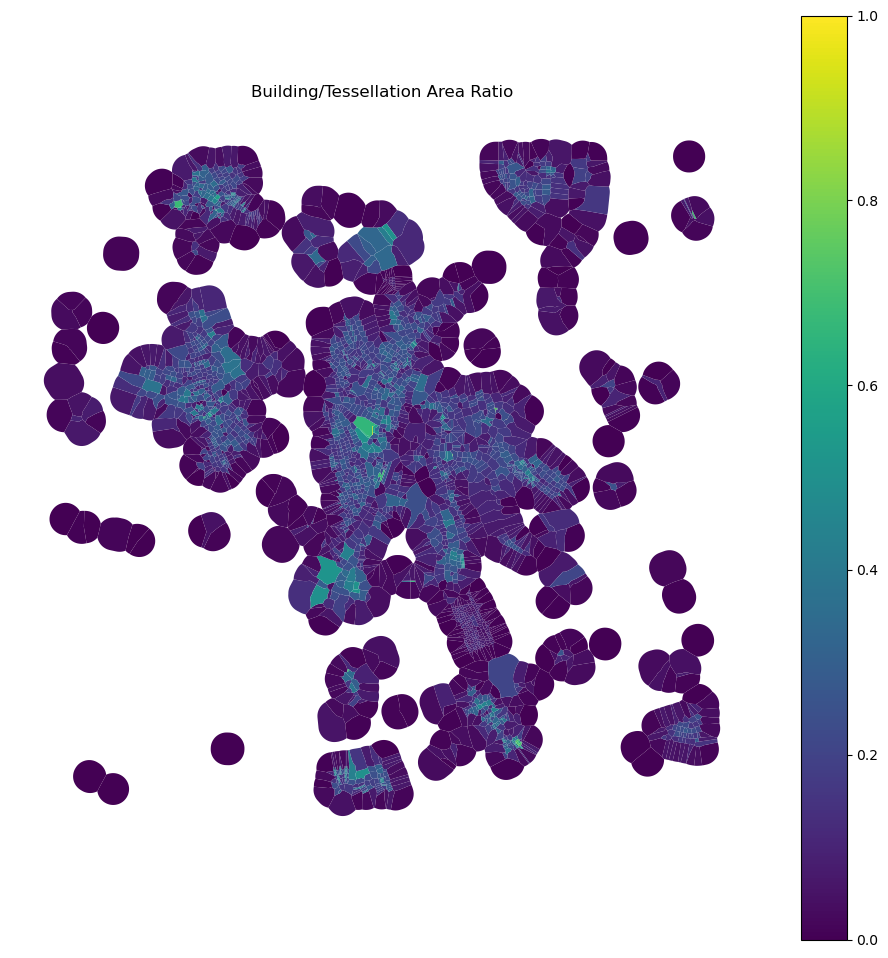

In [40]:
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()
plt.title("Building/Tessellation Area Ratio")

plt.savefig('../results/Effretikon/tessellation_ratio.pdf')  

### Connectivity

In [41]:
graph = momepy.gdf_to_nx(streets)

In [42]:
graph = momepy.node_degree(graph)
graph = momepy.closeness_centrality(graph, radius=400, distance="mm_len")
graph = momepy.meshedness(graph, radius=400, distance="mm_len")

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

In [43]:
nodes, streets = momepy.nx_to_gdf(graph)

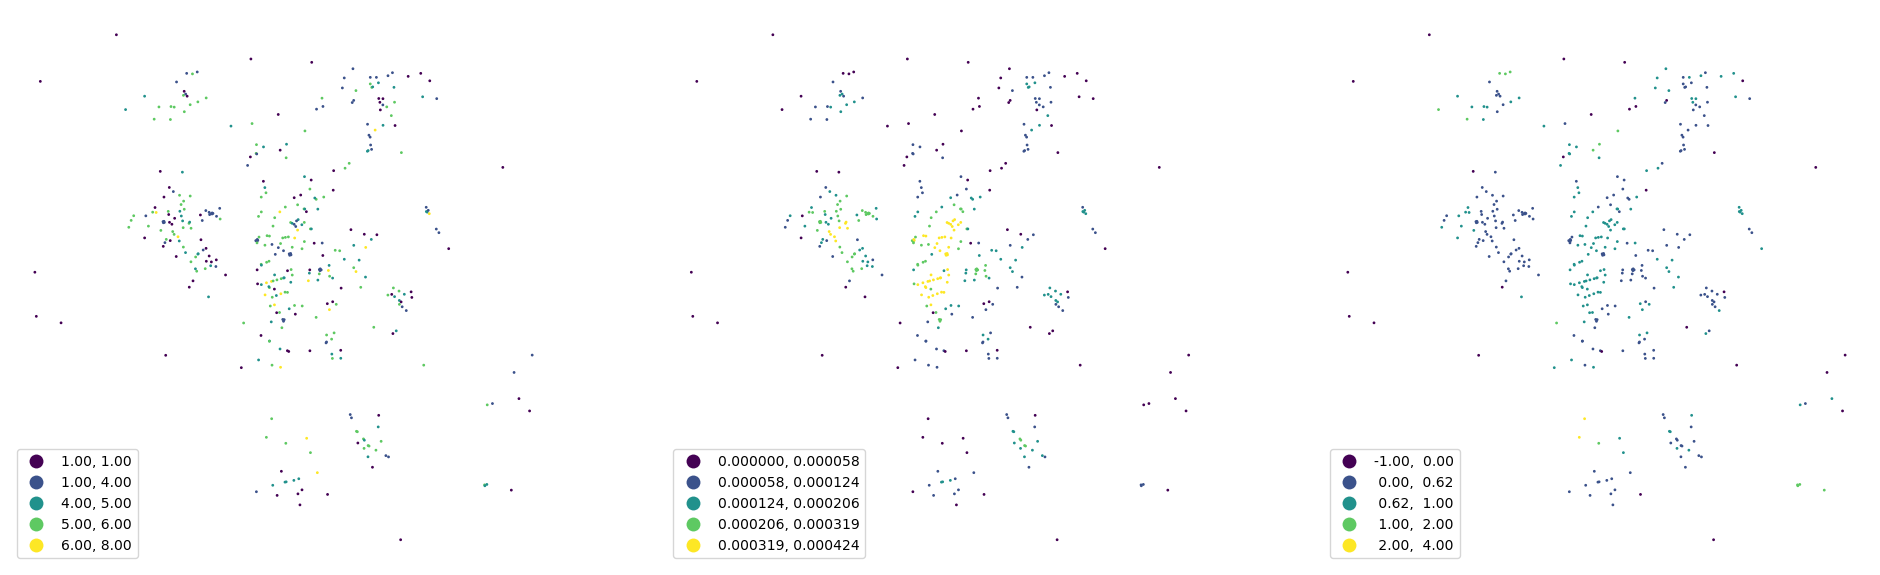

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Effretikon/connectivity.pdf')  

In [45]:
buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/403706460.py:1: FutureWarning: Class based API like `momepy.get_node_id` is deprecated. Replace it with `momepy.get_nearest_node` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")


  0%|          | 0/3107 [00:00<?, ?it/s]

Link all data together (to tessellation cells or buildings).

In [46]:
tessellation

uID                                           geometry    nID  \
0     2845  POLYGON ((2695741.144 1251711.712, 2695785.188...  274.0   
1      111  POLYGON ((2696173.406 1251798.406, 2696173.282...  843.0   
2      113  POLYGON ((2696148.518 1251795.749, 2696148.576...  843.0   
3      112  POLYGON ((2696087.014 1251709.668, 2696088.120...  843.0   
4      123  POLYGON ((2696075.901 1251807.091, 2696076.570...  843.0   
...    ...                                                ...    ...   
3102   346  POLYGON ((2693273.901 1255460.306, 2693273.558...  680.0   
3103  2123  POLYGON ((2693205.466 1255500.243, 2693205.161...  675.0   
3104  2151  POLYGON ((2693429.719 1255160.194, 2693430.120...  663.0   
3105    79  POLYGON ((2693655.697 1255245.730, 2693651.408...  783.0   
3106   339  POLYGON ((2693250.876 1255506.902, 2693250.495...  680.0   

              area  convexity  neighbors  covered_area       car  
0     24799.222600   0.997308   0.005101  61688.054496  0.001706  
1     12928.717165   0.993615   0.004482  21077.515862  0.011594  
2      4358.949113   0.977738   0.009509  25657.726777  0.034129  
3      4580.210915   0.992797   0.015770  19316.807376  0.031972  
4      3756.062023   0.922224   0.015814  14523.632360  0.055833  
...            ...        ...        ...           ...       ...  
3102   4164.525094   0.978643   0.016289  25642.009056  0.038022  
3103   5881.098756   0.937897   0.017242  29256.609805  0.063695  
3104  15706.355843   0.989529   0.006082  52320.438481  0.009806  
3105  14331.144195   0.957486   0.004160  41102.010374  0.032478  
3106  12465.695393   0.992343   0.007021  23467.087747  0.012248  

[3107 rows x 8 columns]

In [47]:
merged = tessellation.merge(buildings.drop(columns=['nID', 'geometry']), on='uID')
merged = merged.merge(streets.drop(columns='geometry'), on='nID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [48]:
merged.columns

Index(['uID', 'geometry', 'nID', 'area_x', 'convexity', 'neighbors',
       'covered_area', 'car', 'area_y', 'eri', 'elongation', 'shared_walls',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'length', 'linearity', 'width', 'width_deviation', 'openness', 'mm_len',
       'node_start', 'node_end', 'x', 'y', 'degree', 'closeness',
       'meshedness'],
      dtype='object')

## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [49]:
percentiles = []
for column in merged.columns.drop(["uID", "nodeID", "nID", 'mm_len', 'node_start', 'node_end', "geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_74755/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API

In [50]:
percentiles_joined = pandas.concat(percentiles, axis=1)

In [51]:
percentiles_joined

area_x_25     area_x_50     area_x_75  convexity_25  convexity_50  \
0     1410.718943   2885.999893   6023.200088      0.952341      0.978902   
1      731.448444   1727.337439   4074.399349      0.955916      0.973330   
2      806.152992   1727.337439   3772.955803      0.957599      0.973330   
3      558.531819    985.345323   3687.351311      0.956396      0.974074   
4      633.236368    984.449575   2871.898992      0.955916      0.975025   
...           ...           ...           ...           ...           ...   
3102  1038.480834   1549.864977   6048.287252      0.926242      0.950144   
3103   920.272158   1124.348317   2897.160068      0.937823      0.956041   
3104   795.042338   2904.930752  11255.692691      0.931135      0.945331   
3105  8952.732670  14628.163168  19043.424947      0.947092      0.968553   
3106  1012.576797   1385.301914   5905.815973      0.937823      0.950144   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         0.986551      0.011277      0.016851      0.034060     14549.456523   
1         0.984436      0.015792      0.019000      0.050052      8780.286959   
2         0.983211      0.015792      0.019000      0.050052      9299.232848   
3         0.984299      0.015814      0.041579      0.057685      5948.540664   
4         0.984436      0.015792      0.046229      0.057166      5289.277112   
...            ...           ...           ...           ...              ...   
3102      0.979660      0.016127      0.032440      0.044753     13519.754900   
3103      0.975531      0.023589      0.044184      0.046355      7568.107017   
3104      0.977565      0.015289      0.022679      0.027280     26274.114933   
3105      0.986270      0.005988      0.006650      0.012072     57545.721570   
3106      0.977157      0.016062      0.035462      0.044753     13519.754900   

      ...          y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ...  1.251974e+06        6.0        6.0        6.0      0.000050   
1     ...  1.251582e+06        5.0        5.0        5.0      0.000074   
2     ...  1.251582e+06        5.0        5.0        5.0      0.000074   
3     ...  1.251582e+06        5.0        5.0        5.0      0.000074   
4     ...  1.251582e+06        5.0        5.0        5.0      0.000074   
...   ...           ...        ...        ...        ...           ...   
3102  ...  1.255384e+06        6.0        6.0        6.0      0.000098   
3103  ...  1.255436e+06        4.0        6.0        6.0      0.000098   
3104  ...  1.255249e+06        5.0        5.5        6.0      0.000018   
3105  ...  1.255132e+06        5.5        6.0        6.0      0.000046   
3106  ...  1.255384e+06        6.0        6.0        6.0      0.000098   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0         0.000072      0.000072       1.166667       1.333333       1.333333  
1         0.000074      0.000074       1.333333       1.333333       1.333333  
2         0.000074      0.000074       1.333333       1.333333       1.333333  
3         0.000074      0.000074       1.333333       1.333333       1.333333  
4         0.000074      0.000074       1.333333       1.333333       1.333333  
...            ...           ...            ...            ...            ...  
3102      0.000098      0.000130       0.684211       0.684211       0.739130  
3103      0.000107      0.000130       0.684211       0.711670       0.739130  
3104      0.000032      0.000138       0.571429       0.666667       1.000000  
3105      0.000046      0.000046       0.571429       0.571429       0.619048  
3106      0.000098      0.000114       0.684211       0.711670       0.739130  

[3107 rows x 66 columns]

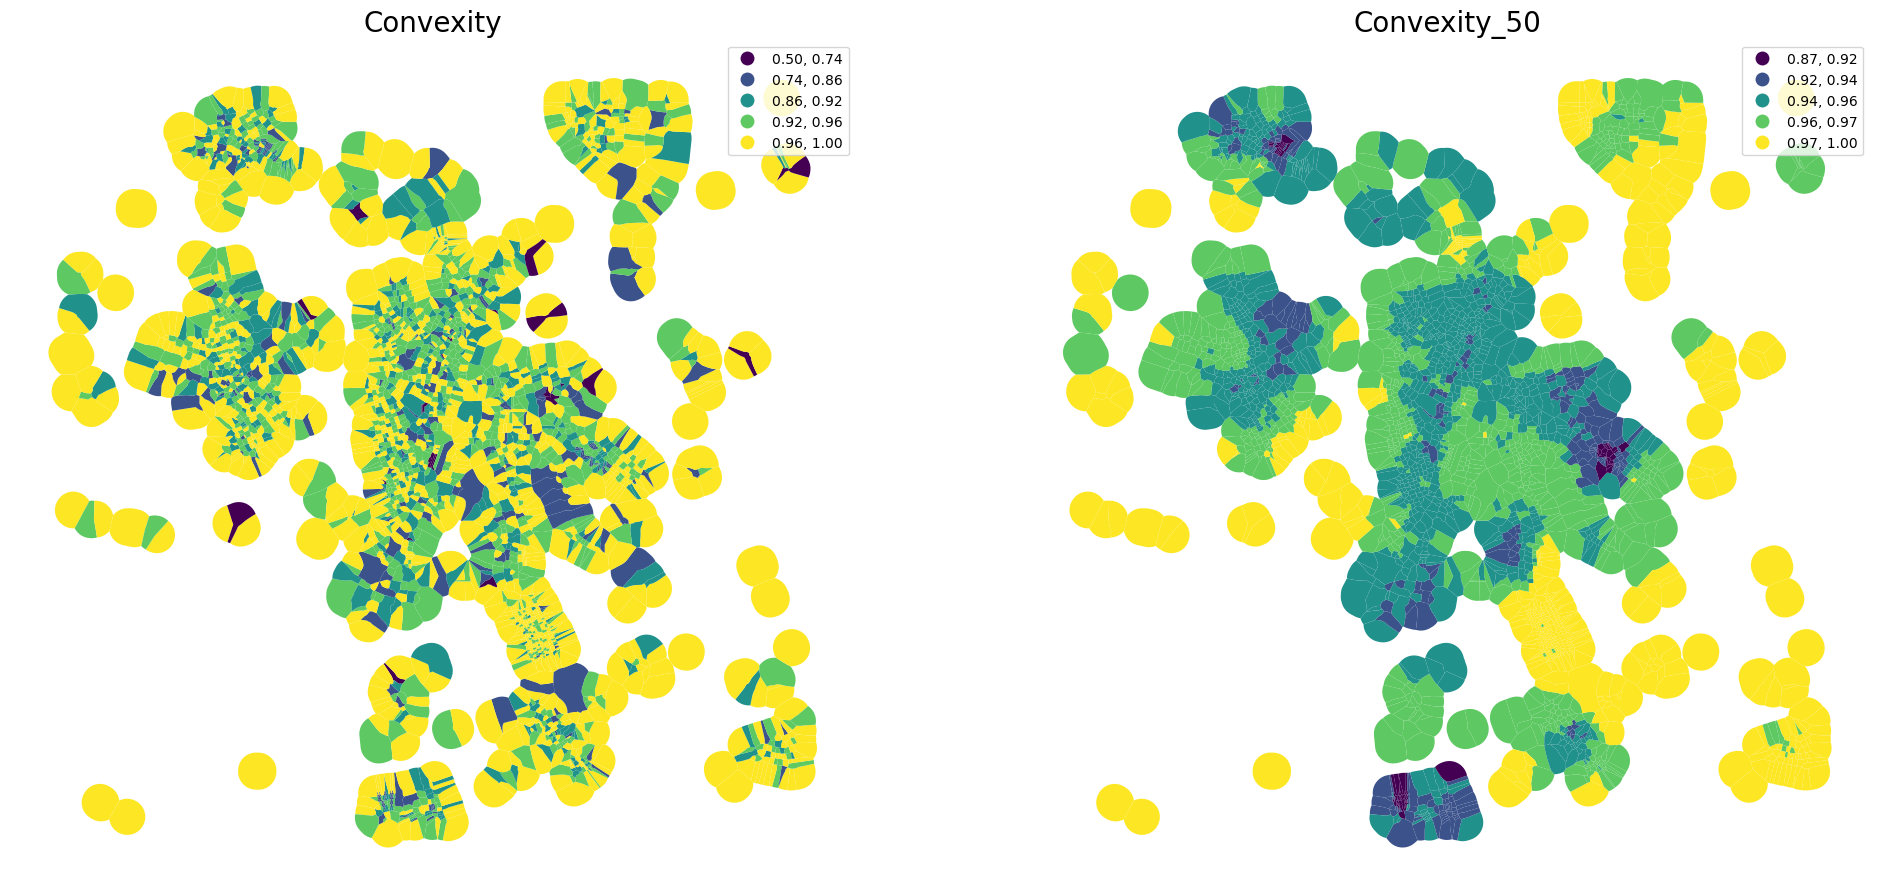

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Convexity_50', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Effretikon/convexity.pdf')  

## Clustering

Standardize values before clustering.

In [53]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()

In [54]:
standardized

area_x_25  area_x_50  area_x_75  convexity_25  convexity_50  \
0      0.151992   0.369908   0.724895      1.080311      1.417222   
1     -0.130485  -0.020736   0.229152      1.214204      1.070232   
2     -0.099419  -0.020736   0.152470      1.277210      1.070232   
3     -0.202393  -0.270899   0.130694      1.232178      1.116541   
4     -0.171327  -0.271201  -0.076744      1.214204      1.175795   
...         ...        ...        ...           ...           ...   
3102  -0.002804  -0.080571   0.731277      0.102918     -0.373589   
3103  -0.051962  -0.224034  -0.070318      0.536620     -0.006370   
3104  -0.104039   0.376290   2.055955      0.286141     -0.673305   
3105   3.288368   4.328784   4.037026      0.883750      0.772769   
3106  -0.013577  -0.136053   0.695035      0.536620     -0.373589   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         1.160639     -1.280328     -1.429180     -1.035470         0.567869   
1         0.944234     -1.002743     -1.316640     -0.289667        -0.043029   
2         0.818883     -1.002743     -1.316640     -0.289667         0.011923   
3         0.930205     -1.001368     -0.134236      0.066324        -0.342883   
4         0.944234     -1.002743      0.109281      0.042110        -0.412692   
...            ...           ...           ...           ...              ...   
3102      0.455490     -0.982142     -0.612808     -0.536792         0.458834   
3103      0.032982     -0.523361      0.002195     -0.462075        -0.171387   
3104      0.241049     -1.033688     -1.123962     -1.351635         1.809395   
3105      1.131867     -1.605508     -1.963401     -2.060914         5.120748   
3106      0.199332     -0.986163     -0.454576     -0.536792         0.458834   

      ...      y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ... -1.688247   0.962913   0.636675   0.160963     -0.853719   
1     ... -2.071800   0.356207  -0.245662  -0.829701     -0.576374   
2     ... -2.071800   0.356207  -0.245662  -0.829701     -0.576374   
3     ... -2.071800   0.356207  -0.245662  -0.829701     -0.576374   
4     ... -2.071800   0.356207  -0.245662  -0.829701     -0.576374   
...   ...       ...        ...        ...        ...           ...   
3102  ...  1.653898   0.962913   0.636675   0.160963     -0.315017   
3103  ...  1.704473  -0.250498   0.636675   0.160963     -0.315017   
3104  ...  1.521064   0.356207   0.195507   0.160963     -1.214746   
3105  ...  1.406794   0.659560   0.636675   0.160963     -0.890952   
3106  ...  1.653898   0.962913   0.636675   0.160963     -0.315017   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0        -0.864603     -1.055168       1.486311       1.760945       1.625906  
1        -0.844439     -1.036607       1.896029       1.760945       1.625906  
2        -0.844439     -1.036607       1.896029       1.760945       1.625906  
3        -0.844439     -1.036607       1.896029       1.760945       1.625906  
4        -0.844439     -1.036607       1.896029       1.760945       1.625906  
...            ...           ...            ...            ...            ...  
3102     -0.611980     -0.520837       0.300284       0.161751       0.148434  
3103     -0.516103     -0.520837       0.300284       0.229402       0.148434  
3104     -1.268230     -0.445401       0.023030       0.118529       0.797080  
3105     -1.124234     -1.294145       0.023030      -0.116102      -0.150149  
3106     -0.611980     -0.671739       0.300284       0.229402       0.148434  

[3107 rows x 66 columns]

### How many clusters?

In [55]:
cgram = Clustergram(range(1, 12), n_init=10, random_state=0)
cgram.fit(standardized.fillna(0))

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.046 seconds.
K=3 fitted in 0.051 seconds.
K=4 fitted in 0.047 seconds.
K=5 fitted in 0.053 seconds.
K=6 fitted in 0.060 seconds.
K=7 fitted in 0.075 seconds.
K=8 fitted in 0.061 seconds.
K=9 fitted in 0.067 seconds.
K=10 fitted in 0.082 seconds.
K=11 fitted in 0.076 seconds.


Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10, 'random_state': 0})

In [56]:
show(cgram.bokeh())

In [57]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10  11
0   0   0   2   1   3   4   6   4   0   7   5
1   0   0   2   1   3   4   6   4   0   7   5
2   0   0   2   1   3   4   6   4   0   7   5
3   0   0   2   1   3   4   6   4   0   7   5
4   0   0   2   1   3   4   6   4   0   7   5

In [58]:
merged["cluster"] = cgram.labels[8].values

In [59]:
urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")

In [60]:
urban_types.explore("cluster", categorical=True, prefer_canvas=True, tiles="CartoDB Positron", tooltip=False)

## Export

Save cluster output geodata to geojson file:

In [61]:
urban_types.to_file('../data/raw/Effretikon.geojson', driver='GeoJSON')

## Utilities

Once you run the cell below, it hides all cells below the currently active one (aka presentation mode).

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: none;
}
</style>

Run this cell to turn the presentation mode off.

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: block;
}
</style>